In [1]:
import pandas as pd
import seaborn as sns
import re
from collections import Counter, defaultdict

In [2]:
with open('anthology+abstracts.bib', 'r') as f:
    acl = [x.replace('\n', '') for x in re.split("\n@", f.read())]

In [3]:
acl[0]

'@proceedings{winlp-2020-widening,    title = "Proceedings of the The Fourth Widening Natural Language Processing Workshop",    editor = "Cunha, Rossana  and      Shaikh, Samira  and      Varis, Erika  and      Georgi, Ryan  and      Tsai, Alicia  and      Anastasopoulos, Antonios  and      Chandu, Khyathi Raghavi",    month = jul,    year = "2020",    address = "Seattle, USA",    publisher = "Association for Computational Linguistics",    url = "https://www.aclweb.org/anthology/2020.winlp-1.0",}'

In [4]:
years_count = defaultdict(int)
nuance_count = defaultdict(int)
abstract_count = defaultdict(int)

year_pattern = "year = \"\d\d\d\d\"\,"
nuance_pattern = "(nuance|fine-grained|fine grain|fine-grain)"
abstract_pattern = "abstract = "

for entry in acl:
    year = int(''.join(filter(str.isdigit, re.search(year_pattern, entry).group(0))))
    
    years_count[year] += 1
    
    if re.search(nuance_pattern, entry):
        nuance_count[year] += 1 
    if re.search(abstract_pattern, entry):
        abstract_count[year] += 1

In [5]:
nuance_df = pd.DataFrame.from_dict(nuance_count, orient="index")
nuance_df = nuance_df.rename(columns={0:'Count'})
nuance_df['Year'] = nuance_df.index

In [6]:
nuance_df

,Count,Year
2020,81,2020
2019,127,2019
2018,75,2018
2017,62,2017
2016,43,2016
2015,3,2015
2014,11,2014
2012,14,2012
2010,17,2010
2009,1,2009


In [34]:
percentage_nuance = {year: (nuance_count[year]/years_count[year]) for year in nuance_count.keys()}
abspercent_nuance = {year: ((nuance_count[year]/abstract_count[year]) if abstract_count[year]!=0 else 
                                      (1)) for year in nuance_count.keys()}
nuance_df.loc[:,"Percent"] = nuance_df['Year'].apply(lambda x: (percentage_nuance[x])*100)
nuance_df.loc[:,"absPercent"] = nuance_df['Year'].apply(lambda x: (abspercent_nuance[x])*100)

In [54]:
print(abstract_count[2010], abstract_count[2012], years_count[2010], years_count[2012])

642 670 2734 3138


In [38]:
nuance_df

,Count,Year,Percent,absPercent
2020,81,2020,3.043968,3.121387
2019,127,2019,2.709044,3.044833
2018,75,2018,1.655629,2.227502
2017,62,2017,1.858513,2.448657
2016,43,2016,1.074731,2.520516
2015,3,2015,0.108225,2.112676
2014,11,2014,0.323434,1.383648
2012,14,2012,0.446144,2.089552
2010,17,2010,0.621800,2.647975
2009,1,2009,0.053362,100.000000


In [45]:
nuance_df = nuance_df[(nuance_df['Year']>=2000) & (nuance_df['Year']!=2009)]

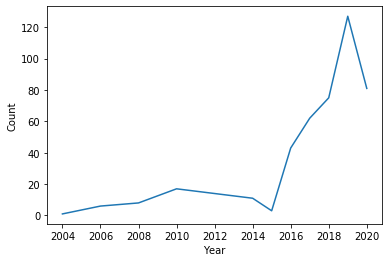

In [46]:
sns.lineplot(x="Year", y="Count", data=nuance_df)

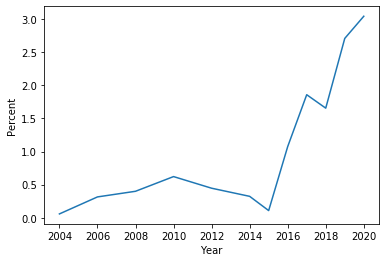

In [47]:
sns.lineplot(x="Year", y="Percent", data=nuance_df)

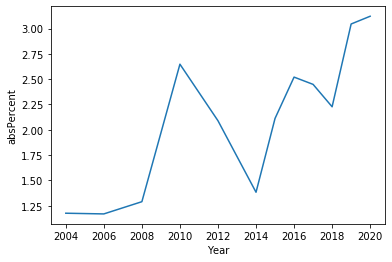

In [48]:
sns.lineplot(x="Year", y="absPercent", data=nuance_df)

In [49]:
nuance_df

,Count,Year,Percent,absPercent
2020,81,2020,3.043968,3.121387
2019,127,2019,2.709044,3.044833
2018,75,2018,1.655629,2.227502
2017,62,2017,1.858513,2.448657
2016,43,2016,1.074731,2.520516
2015,3,2015,0.108225,2.112676
2014,11,2014,0.323434,1.383648
2012,14,2012,0.446144,2.089552
2010,17,2010,0.621800,2.647975
2008,8,2008,0.399800,1.290323


In [55]:
nuance_df.reset_index()[['Year', 'Count', 'Percent', 'absPercent']].to_csv('nuance.csv')